In [1]:
# Arsal Munawar
# Analysis and Visualization of 2012 Election Data
# the following code is to be run in Jupyter notebook but can be run in other environments

# The following questions regarding the 2012 election between Barack Obama and Mitt Romney will be answered:
# 1. Who was being polled and what was their party affiliation?
# 2. Did the poll results favor Romney or Obama?
# 3. How do undecided voters effect the poll?
# 4. Can we account for the undecided voters?
# 5. How did voter sentiment change over time?
# 6. Can we see an effect in the polls from the debates?

# After that, the following questions regarding donations to the campaigns will be answered:
# 7. How much was donated and what was the average donation?
# 8. How did the donations differ between candidates?
# 9. How did the donations differ between Democrats and Republicans?
# 10. What were the demographics of the donors?
# 11. Is there a pattern to donation amounts?

In [2]:
# first lets import all necessary packages and import the first data set

# import the data handling packages
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# import the data visualization packages, and lets make sure the plots show up and have white grid backgrounds
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# use __future__ to allow us to use proper division with floats
from __future__ import division

# requests is imported to gather data from the web
import requests

# StringIO will make it easier to read csv data
from StringIO import StringIO

# this is the URL where the data exists
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# this will convert the information into text form
source = requests.get(url).text
poll_data = StringIO(source)

# this will turn the data into a dataframe
poll_df = pd.read_csv(poll_data)

In [4]:
# lets see the columns info
poll_df.info()
# looking at the info, we can see that there are 586 rows and 17 columns of varying data types. some columns have 
# incomplete entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


In [5]:
# lets take a look at the first 10 rows of the data set
poll_df.head(10)
# based on quick observations, any NaN values in the 'other' or 'undecided' columns can be set to 0. The other
# column which contain NaN values will be dealt with if needed.

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1
5,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06T07:38:41Z,1041.0,Likely Voters,Internet,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep,NaN,1
6,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05T18:30:15Z,3000.0,Likely Voters,Live Phone,49.0,48.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None,NaN,1
7,Ipsos/Reuters (Web),2012-11-01,2012-11-05,2012-11-05T16:12:48Z,4725.0,Likely Voters,Internet,48.0,46.0,4.0,2.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/ipsos1105...,Nonpartisan,None,NaN,1
8,ARG,2012-11-02,2012-11-04,2012-11-05T13:06:54Z,1200.0,Likely Voters,Live Phone,49.0,49.0,1.0,1.0,http://elections.huffingtonpost.com/pollster/p...,http://americanresearchgroup.com/pres2012/NA12...,Nonpartisan,None,NaN,1
9,PPP (D-Americans United for Change),2012-11-02,2012-11-04,2012-11-04T22:32:19Z,1200.0,Likely Voters,Automated Phone,50.0,48.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2011/PP...,Sponsor,Dem,NaN,1


In [6]:
# it's also good practice to look at the last 10 rows of data as well
poll_df.tail(10)
# note that the polls were conducted over the course of a few years, with the earliest polls being in March 2009 and 
# the latest polls being just days before the election.

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
576,PPP (D),2009-10-16,2009-10-19,2009-10-22T08:16:05Z,766.0,Registered Voters,Automated Phone,48.0,40.0,12.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1
577,PPP (D),2009-09-21,2009-09-21,2009-09-24T10:45:45Z,621.0,Registered Voters,Automated Phone,48.0,39.0,13.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1
578,Clarus,2009-08-14,2009-08-18,2010-11-08T11:11:21Z,1003.0,Registered Voters,Live Phone,47.0,38.0,15.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.clarusrg.com/press_releases/2009/Ob...,Nonpartisan,None,NaN,1
579,PPP (D),2009-08-14,2009-08-17,2009-08-20T08:31:37Z,909.0,Registered Voters,Automated Phone,47.0,40.0,12.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1
580,Rasmussen,2009-07-18,2009-07-19,2010-11-08T11:05:08Z,1000.0,Likely Voters,Automated Phone,45.0,45.0,3.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1
581,PPP (D),2009-07-15,2009-07-16,2010-11-08T11:02:37Z,577.0,Registered Voters,Automated Phone,49.0,40.0,11.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1
582,PPP (D),2009-06-12,2009-06-16,2010-11-08T10:58:00Z,638.0,Registered Voters,Automated Phone,48.0,40.0,12.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1
583,PPP (D),2009-05-14,2009-05-18,2010-11-08T10:49:08Z,1000.0,Registered Voters,Automated Phone,53.0,35.0,12.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1
584,PPP (D),2009-04-17,2009-04-19,2010-11-08T10:45:18Z,686.0,Registered Voters,Automated Phone,50.0,39.0,11.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1
585,PPP (D),2009-03-13,2009-03-15,2010-11-08T10:36:31Z,1403.0,Registered Voters,Automated Phone,44.0,44.0,12.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/PPP_Rel...,Pollster,Dem,NaN,1


Likely Voters                 292
Registered Voters             252
Adults                         41
Likely Voters - Republican      1
Name: Population, dtype: int64

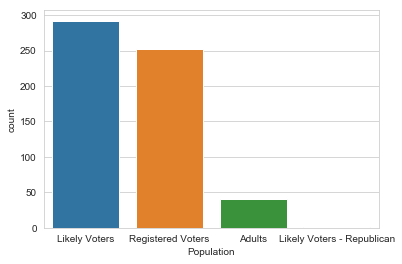

In [7]:
# 1. lets get to answering the first question. Who was being polled and what was their party affiliation?

# lets see who was being polled. this will give us the count for each unique entry in the column, and will create
# a barchart
sns.countplot('Population',data=poll_df)
poll_df['Population'].value_counts()
# the pollees consisted of likely voters, registered voters, and adults. In others words, people who have an interest
# in politics or are affected by decisions made by politicians. its important to use both lines of code above to get
# the count plot and the actual count

None     480
Dem       93
Rep        9
Other      4
Name: Affiliation, dtype: int64

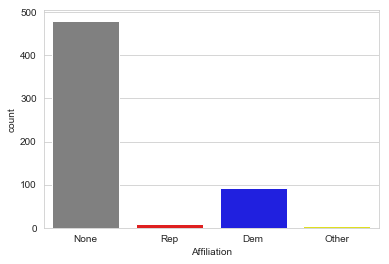

In [8]:
# now lets see the party affiliation of the poll sites.
sns.countplot('Affiliation',data=poll_df,palette=['grey','red','blue','yellow'])
poll_df['Affiliation'].value_counts()
# most polls were neither Democractic or Republican, but still there were far more dems than reps. This is potentially
# sampling bias and could skew the poll results that we see ahead

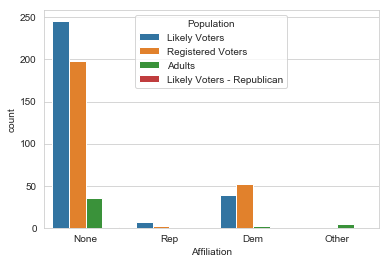

In [9]:
# lets combine both the population and affiliation into one graph to see what we can find. the party affiliation
# is the x-axis, and is varied by the population
sns.countplot('Affiliation',data=poll_df,hue='Population')
# the un-affiliated polls had the highest number of registered and likely voters

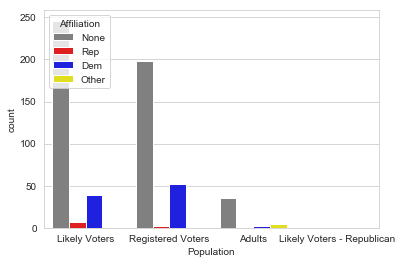

In [10]:
# another graph, but with affliation and population switched
sns.set_style('whitegrid')
sns.countplot('Population',data=poll_df,hue='Affiliation',palette=['grey','red','blue','yellow'])
# most of the pollees were casting their opinions on un-affiliated polls, which is good.

# In summary, most pollees were likely or registered voters, and most poll sites were unaffiliated, but some were
# democratic. now that we know who was being polled and the poll affiliations, lets move on to the next question.

In [11]:
# 2. lets find out if the polls favored Obama or Romney

# lets first find the average poll response for Obama, Romney, Other, and Undecided. lets also remove te columns which
# we do not need to see using .drop()
avg = pd.DataFrame(poll_df.mean())
avg.drop(['Number of Observations','Question Text','Question Iteration'], axis=0, inplace=True)
avg #or 'print(avg)' if using a traditional environment
# we can see that on average, Obama was favored over Romney by just 2.2 points.

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238


In [12]:
# lets find the standard deviation of those poll numbers
std = pd.DataFrame(poll_df.std())
std.drop(['Number of Observations','Question Text','Question Iteration'], axis=0, inplace=True)
std #or 'print(std)' if using a traditional environment
# not only was Obama favored in the polls, but also had a smaller variation between the polls than Romney. Obama was
# the steady favorite.

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726


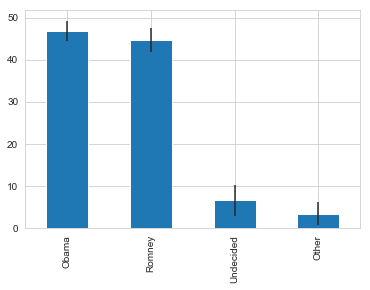

In [13]:
# lets create a bar chart of the mean with the std being the error on the y-axis
avg.plot(yerr=std,kind='bar',legend=False)
# the undecided voters make up a decent chunk, roughly 7%. they will have a big impact on the election results.
# this leads us to our next question.

In [14]:
# 3,4,5. lets see how undecided voters effect the poll, and how voter sentiment changed over time

# first lets combine the avg and std charts for easier comparison, and lets rename the columns.
poll_avg = pd.concat([avg,std],axis=1)
poll_avg.columns = ['Average','STD']
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726


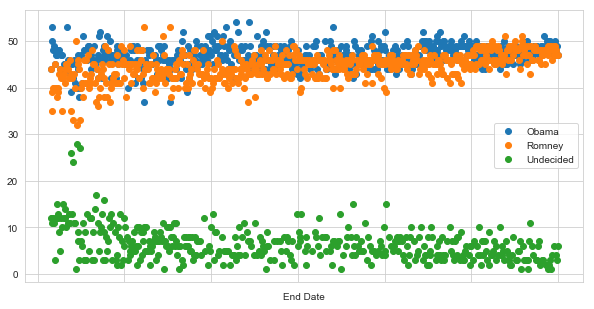

In [15]:
# we will create a crude time-series graph of voter sentiment for all polls, to see how opinions changed as election
# time came closer. the initial plot is in reverse time-order, so we must invert the x-axis
time_series = poll_df.plot(x='End Date', y=['Obama','Romney','Undecided'],marker='o',linestyle='',figsize=(10,5))
time_series.invert_xaxis()
# the plot shows that voters who were initially undecided eventually made decisions. we can also see the gap in
# voter sentiment between Obama and Romney close towards the election date. this gives us a quick idea, but
# lets get more specific.

In [16]:
# lets find the poll difference between Obama and Romney by using data we already have. well create a new column
# in the databse.
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100
poll_df['Difference'].head
# a positive difference means Obama is favored, and a negative difference means Romney is favored

<bound method Series.head of 0      0.00
1      0.02
2      0.00
3      0.01
4     -0.01
5      0.00
6      0.01
7      0.02
8      0.00
9      0.02
10     0.00
11     0.03
12    -0.01
13     0.02
14     0.00
15     0.04
16     0.03
17     0.01
18     0.02
19     0.03
20     0.01
21     0.00
22     0.01
23     0.02
24     0.01
25     0.00
26     0.00
27     0.00
28     0.01
29     0.01
       ... 
556   -0.05
557    0.01
558    0.03
559    0.09
560    0.03
561    0.02
562    0.04
563   -0.03
564    0.03
565    0.02
566    0.08
567   -0.01
568    0.04
569    0.00
570    0.02
571    0.02
572    0.12
573    0.05
574    0.00
575    0.05
576    0.08
577    0.09
578    0.09
579    0.07
580    0.00
581    0.09
582    0.08
583    0.18
584    0.11
585    0.00
Name: Difference, Length: 586, dtype: float64>

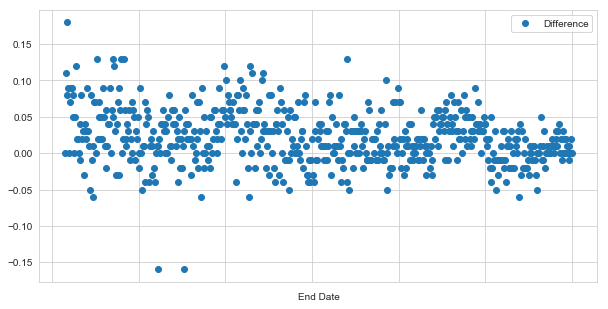

In [17]:
# lets plot the difference over time
poll_diff = poll_df.plot(x='End Date', y=['Difference'],marker='o',linestyle='',figsize=(10,5))
poll_diff.invert_xaxis()
# we can see that the difference in poll scores decreases with time.

In [18]:
# to get a clearer picture on the difference over time, lets group the polls by start date and display the data.
# we will display the data by group date, and in particular we will show the mean difference for each start date
poll_df = poll_df.groupby(['Start Date'], as_index=False).mean()
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


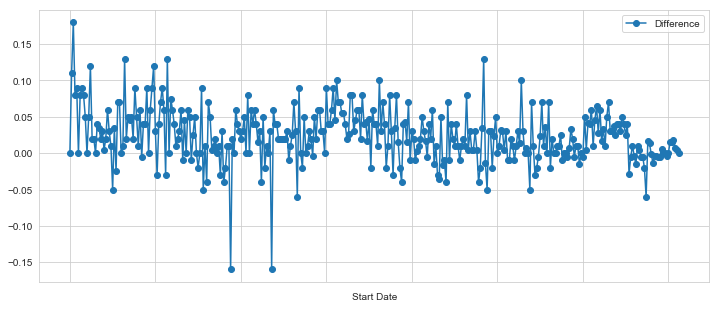

In [19]:
# now lets plot the start date and mean difference to better visualize the above graph
diff_plot = poll_df.plot(x='Start Date', y='Difference', marker='o', linestyle='-', figsize=(12,5))
# this is a slightly clearer graph from before, highlighting the same trend.

In [20]:
# 6. Can we see an effect in the polls from the debates?

# the debates occured on October 3, 16, 22 of 2012. Lets see if the debates changed the polls in any way. first lets
# find the exact dates on the time series that the debates occured, then we'll plot vertical lines on those dates to
# clearly see the cange before and after the debates.

In [21]:
# this is a loop that will determine all of the indexes which include October 2012 as the start date. We will plot
# the index range so we can see all poll resutls from October 2012. We can also do this by simply sorting the
# dataframe and manually checking the indexes, but this will not be useful for large dataframes or for instances
# in which specific rows must be found. So it is useful to create a loop to be able to do this for future use.
row_index = 0
xlimit = []
oct_day = []

for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_index)
        row_index += 1
        oct_day.append(date)
    else:
        row_index += 1


count = 0
for x in xlimit:
    print xlimit[count],oct_day[count]
    count += 1
# we can see that the October 2012 is between indexes 325 and 352. these will be the limits of our graph
# of the debate dates. we can also see the exact days in October next to those indexes.

325 2012-10-01
326 2012-10-02
327 2012-10-04
328 2012-10-05
329 2012-10-06
330 2012-10-07
331 2012-10-08
332 2012-10-10
333 2012-10-11
334 2012-10-12
335 2012-10-13
336 2012-10-14
337 2012-10-15
338 2012-10-16
339 2012-10-17
340 2012-10-18
341 2012-10-19
342 2012-10-20
343 2012-10-22
344 2012-10-23
345 2012-10-24
346 2012-10-25
347 2012-10-26
348 2012-10-27
349 2012-10-28
350 2012-10-29
351 2012-10-30
352 2012-10-31


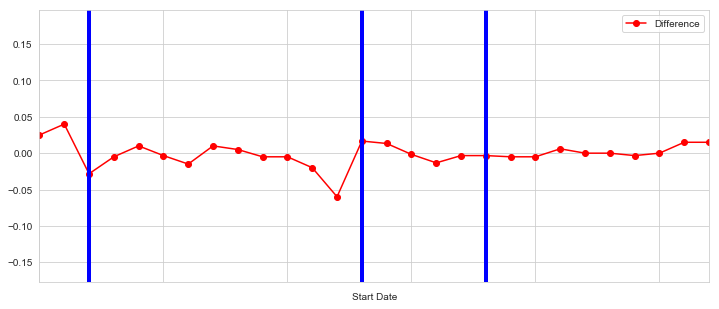

In [23]:
# using our plot of start time and difference, we add the x-axis limits and plot again
diff_plot = poll_df.plot(x='Start Date', y='Difference', marker='o', linestyle='-', color='red', figsize=(12,5),
                         xlim=(min(xlimit),max(xlimit)))

# lets add vertical lines to the dates of the debates. we know exactly what indexes the debates are.
# For October 3 there is no poll, so we will plot a vertical line for the next date which is 10/4 and
# an index of 327. For the 10/16 and 10/22 debates, we will use 338 and 343 indexes, respectively
plt.axvline(x=327, linewidth=4, color='blue')
plt.axvline(x=338, linewidth=4, color='blue')
plt.axvline(x=343, linewidth=4, color='blue')
# these lines make it easy to see the reaction after the debates. After the first debeate, voter
# sentiment shifted towards Obama, but the opposite trend occured after the second debate. The third
# debate didn't change sentiment much, perhaps because voters had alraedy decided based on the first
# two debates.

In [24]:
# lets find out more about the donor dataset. first lets import the dataset and explore it

donor_df = pd.read_csv("Election Donor Data.csv")
donor_df.info()
donor_df.describe()
# there are over 1 million rows and 16 columns of donor information, which candidate the donations were for, the date
# of the donations, and more information.

C:\Users\munaw\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


,contb_receipt_amt,file_num
count,1.001731e+06,1.001731e+06
mean,2.982352e+02,7.744948e+05
std,3.749667e+03,1.059822e+04
min,-3.080000e+04,7.235110e+05
25%,3.500000e+01,7.719270e+05
50%,1.000000e+02,7.792250e+05
75%,2.500000e+02,7.802340e+05
max,2.014491e+06,7.878030e+05


In [25]:
#7. How much was donated and what was the average donation?
donor_df['contb_receipt_amt'].sum()
donor_df['contb_receipt_amt'].mean()
donor_df['contb_receipt_amt'].describe()
donor_df['contb_receipt_amt'].value_counts()
# the total amount donated was $298,751,395, and the average donation was $298. a donation of just $100 puts you
# ahead of 50% of the donors, but $2500 puts you ahead of 75% of the people. The largest donation was over $2,000,000
# while the lowest was a negative number, maybe the respective campaigns donated to other campaigns? There were over
# 8,000 different amounts of donations, and the standard deviation of the donations was $3749. That is a high variation,
# which means there were some very low and very high donations which muddy the picture.

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 174.80          1
 7.27            1
 1219.00         1
 1884.88         1
 162.25          1
 218.31          1
 78.62           1
 203.16          1
 53.11           1
 499.66          1
 19.53           1
 188.60          1
 47.10           1
 19.85           1
 28.83           1
 202.59          1
-5500.00         1
 9.25            1
 202.66          1
 1205.00         1
 80.73           1
 115.07     

In [26]:
# lets make a dataframe of just the contribution amounts
top_donor = donor_df['contb_receipt_amt'].copy()
top_donor.sort_values()
# now all donation values are sorted. we can see that there are only 7 donations over $34,000, and these 7 are all above
# $450,000. There are over a million donation records, so although these 7 are large compared to the rest, they probably
# do not have much of an impact on the mean of 298. The negative donation amounts are refunds to donors.

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
33821       -5414.31
908565      -5115.00
456649      -5000.00
574657      -5000.00
30513       -5000.00
562267      -5000.00
30584       -5000.00
86268       -5000.00
708920      -5000.00
665887      -5000.00
708899      -5000.00
708929      -5000.00
21172       -5000.00
21168       -5000.00
21167       -5000.00
262328      -5000.00
946875      -5000.00
7361        -5000.00
416403      -5000.00
21164       -5000.00
707945      -5000.00
615101      -5000.00
7973        -5000.00
54430       -5000.00
54434       -5000.00
             ...    
708022      10000.00
708898      10000.00
710177      10000.00
876244      10000.00
709608      10000.00
708919      10000.00
709739      10000.00
91145       10000.00
708138      10000.00
993178      10000.00
709813      10000.00
710730      10000.00
708928      10000.00
709268      10000.00
99829       10000.00
90076       10000.00
709859      1

In [28]:
# lets take a look at only the donations above zero, so no refunds.
top_donor = top_donor[top_donor > 0]
top_donor
# there were 991475 positive contributions

0           250.0
1            50.0
2           250.0
3           250.0
4           300.0
5           500.0
6           250.0
7           250.0
8           250.0
9           250.0
10          250.0
11          500.0
12          250.0
13          250.0
14          250.0
15          300.0
16          500.0
17         1000.0
18          250.0
19          300.0
20          500.0
21          250.0
22         2500.0
23         2500.0
24          150.0
25          200.0
26          100.0
27          250.0
28          500.0
29          250.0
            ...  
1001696    1000.0
1001697    1500.0
1001698    2500.0
1001699    2500.0
1001700     300.0
1001701    2500.0
1001702    2500.0
1001705    1000.0
1001706    2500.0
1001708    2500.0
1001711    1000.0
1001712    2500.0
1001713    2500.0
1001714     250.0
1001715     250.0
1001716    1000.0
1001717     100.0
1001718    2500.0
1001719    2500.0
1001720     100.0
1001721     250.0
1001722     100.0
1001723     100.0
1001724     500.0
1001725   

In [29]:
# lets sort this list, and see the 10 most common donation amounts
top_donor.sort_values()
top_donor.value_counts().head(10)
# the 10 most commonn donation amounts ranged from 10 to 2500 dollars, with the most common being 100, and 50 and 25
# after that.

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

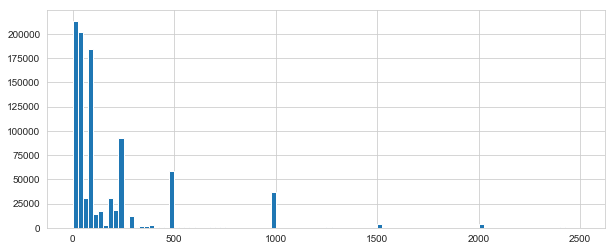

In [30]:
# are donations usually made in even amounts like 100, 250, 1000, etc? lets find out
donation_counts = top_donor[top_donor < 2500]
donation_counts.hist(bins=100,linewidth=1,figsize=(10,4))
# we can see that yes, donations are usually made in even numbers based on the spikes of the histograms

In [32]:
# 8. How did the donations differ between candidates?

# lets sort the donations based on party, but first we have to create a party column
candidates = donor_df.cand_nm.unique()
candidates
# from this list, Obama is the only democrat

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [33]:
# lets make a dictionary to organize the party affiliations
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [34]:
# now make a column in the donor_df of the party dictionary. notice how we are mapping the values of the
# cand_nm column to the new party map column
donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [35]:
# lets clear all the refunds in the contribution column as well
donor_df = donor_df[donor_df.contb_receipt_amt > 0]

In [36]:
# now we can see which candidate had the most donors, and the amount of donations
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()
# we can see that Obama had the most donors, as he was the only Democrat and had no competition, unlike the
# republicans. we can also see that Obama had the largest monetary value of donations

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [37]:
# to make the values more readable
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()
i = 0

for don in cand_amount:
    print " The candidate %s raised %.0f dollars " %(cand_amount.index[i],don)
    print '\n'
    i += 1

 The candidate Bachmann, Michelle raised 2711439 dollars 


 The candidate Cain, Herman raised 7101082 dollars 


 The candidate Gingrich, Newt raised 12832770 dollars 


 The candidate Huntsman, Jon raised 3330373 dollars 


 The candidate Johnson, Gary Earl raised 566962 dollars 


 The candidate McCotter, Thaddeus G raised 39030 dollars 


 The candidate Obama, Barack raised 135877427 dollars 


 The candidate Paul, Ron raised 21009620 dollars 


 The candidate Pawlenty, Timothy raised 6004819 dollars 


 The candidate Perry, Rick raised 20305754 dollars 


 The candidate Roemer, Charles E. 'Buddy' III raised 373010 dollars 


 The candidate Romney, Mitt raised 88335908 dollars 


 The candidate Santorum, Rick raised 11043159 dollars 




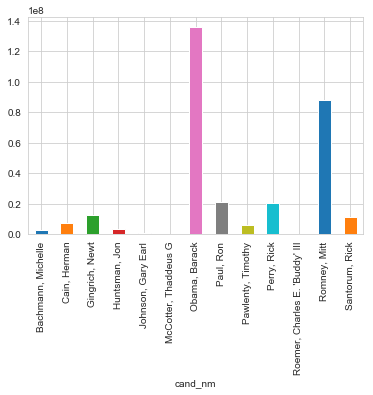

In [38]:
# lets create a bar chart of donations amounts among the candidates, this will be much easier to read
cand_amount.plot(kind='bar')

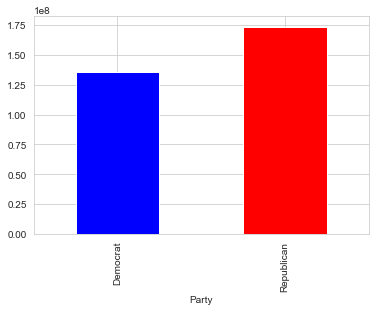

In [39]:
# 9. How did the donations differ between Democrats and Republicans?

# lets make another bar chart comparing the Democartic and Republican party donations
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar',color=['blue','red'])
# The Republicans raised more than the Democrats, but their donations were split maongst all their
# candidates unlike the Democratic party.

In [40]:
# 10. What were the demographics of the donors?

# Use a pivot table to extract and organize the data by the donor occupation
occupation_df = donor_df.pivot_table('contb_receipt_amt', index='contbr_occupation', columns='Party', aggfunc='sum')

In [46]:
# lets see the shape of the dataframe to get an idea
occupation_df.shape
# its (45067, 2), which is quite large

(45067, 2)

In [48]:
# lets limit the table to make it manageable and only see the large sums of donations by occupation
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]
occupation_df.shape
# this is much smaller, (31,2) shape

(31, 2)

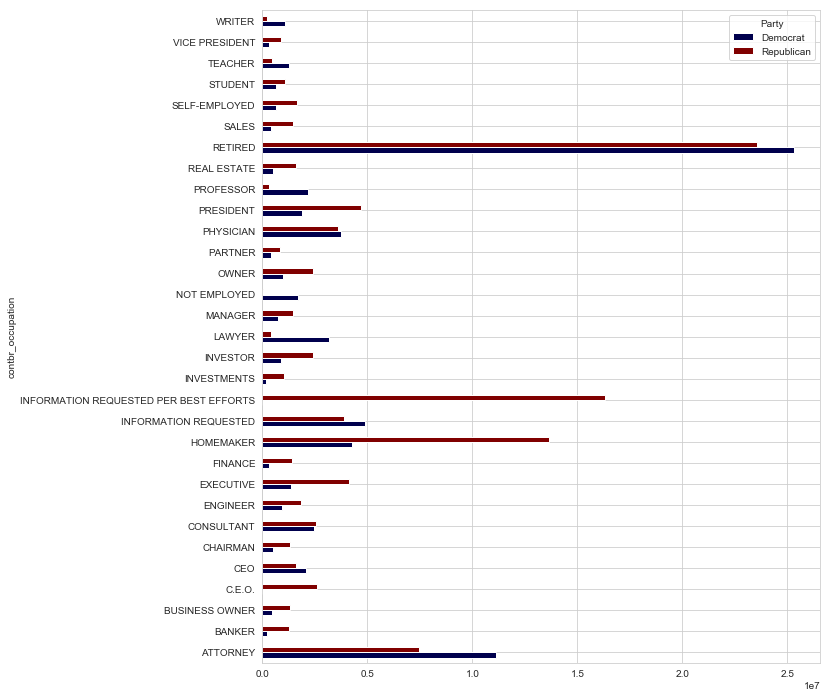

In [49]:
# lets plot the new df
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')
# Looks like there are some occupations that are either mislabeled or aren't really occupations.
# Let's get rid of: Information Requested occupations and let's combine CEO and C.E.O.
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)

In [50]:
# Set new ceo row as sum of the current two
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
# Drop CEO
occupation_df.drop('C.E.O.',inplace=True)

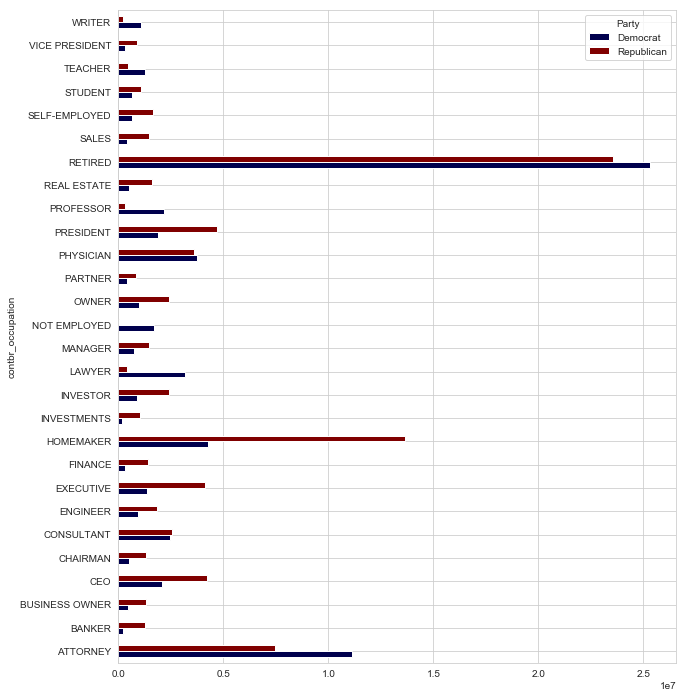

In [55]:
# 11. Is there a pattern to donation amounts?

# Repeat previous plot!
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')
# Looks like CEOs are a little more conservative leaning, this may be due to the tax philosphies
# of each party during the election.